In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

In [2]:
# Assuming the file 'airbnb_Chicago.csv' is available in the current directory
# Reading the CSV file
df = pd.read_csv('airbnb_Chicago.csv')

In [3]:
unique_rows = df.groupby(['Airbnb Host ID', 'Airbnb Property ID', 'Scraped Date']).size().reset_index(name='Counts')

# Get the number of unique rows
number_of_unique_rows = unique_rows.shape[0]
print(number_of_unique_rows)

120217


## Making a heatmap

In [4]:
# corr = df.corr()

# # Isolate the 'Superhost' correlations
# superhost_corr = corr['Superhost'].drop('Superhost')  # This drops the self-correlation of 'Superhost'

# # Convert the series to a DataFrame for better visual presentation
# superhost_corr_df = superhost_corr.to_frame()

# # Sort the DataFrame based on the absolute values of the correlation coefficients
# # from the most correlated to the least correlated
# superhost_corr_df_sorted = superhost_corr_df.abs().sort_values(by='Superhost', ascending=False)

# # Display all rows
# pd.set_option('display.max_rows', None)

# # Show the sorted correlation table
# superhost_corr_df_sorted


# Feature transformation -> Converting dates into ordinal categories

In [5]:
import pandas as pd
 
# Sample DataFrame creation with 'Scraped Date' column
# Replace this with your actual DataFrame loading method
# df = pd.read_csv('path_to_your_csv_file.csv')
 
# Sample data for demonstration purposes
 
# Convert 'Scraped Date' to datetime
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'], format='%d-%m-%Y')
 
# Define the start date of the first period
start_date = pd.Timestamp('2016-01-01')
 
# Function to calculate the period category
def calculate_period_category(date):
    # Calculate the number of quarters since the start date
    quarters_since_start = ((date.year - start_date.year) * 4) + ((date.month - 1) // 3)
    # Add 1 because we are starting with category 1
    return quarters_since_start + 1
 
# Apply the function to the 'Scraped Date' column to create a new 'Period Category' column
df['Period Category'] = df['Scraped Date'].apply(calculate_period_category)
 
# Display the DataFrame
df[['Scraped Date', 'Period Category']]

,Scraped Date,Period Category
0,2016-08-01,3
1,2016-11-01,4
2,2017-02-04,5
3,2017-05-01,6
4,2017-08-01,7
...,...,...
120212,2020-02-15,17
120213,2020-05-01,18
120214,2019-11-02,16
120215,2020-02-09,17


In [6]:
df.drop('Scraped Date', axis=1, inplace=True)
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140,10610,5,26,24,0,0,0,NaN,NaN,...,1.363636,104924,13169324,449,25390,0.004279,0.001928,19.739130,NaN,3
1,2140,10610,6,38,26,0,0,0,NaN,NaN,...,1.472727,68005,7337911,276,22274,0.004059,0.003035,84.833333,19.739130,4
2,2140,10610,7,23,38,0,0,0,NaN,NaN,...,1.472727,134202,17482964,340,19451,0.002533,0.001113,17.903226,84.833333,5
3,2140,10610,8,20,23,0,0,0,NaN,NaN,...,1.125000,132913,18431773,366,28349,0.002754,0.001538,47.000000,17.903226,6
4,2140,10610,9,20,20,0,0,0,NaN,NaN,...,1.472727,118284,15313425,395,27483,0.003339,0.001795,11.800000,47.000000,7



- Period 1: Q1 2016 (January, February, March 2016)
- Period 2: Q2 2016 (April, May, June 2016)
- Period 3: Q3 2016 (July, August, September 2016)
- Period 4: Q4 2016 (October, November, December 2016)
- Period 5: Q1 2017 (January, February, March 2017)
- Period 6: Q2 2017 (April, May, June 2017)
- Period 7: Q3 2017 (July, August, September 2017)
- Period 8: Q4 2017 (October, November, December 2017)
- Period 9: Q1 2018 (January, February, March 2018)
- Period 10: Q2 2018 (April, May, June 2018)
- Period 11: Q3 2018 (July, August, September 2018)
- Period 12: Q4 2018 (October, November, December 2018)
- Period 13: Q1 2019 (January, February, March 2019)
- Period 14: Q2 2019 (April, May, June 2019)
- Period 15: Q3 2019 (July, August, September 2019)
- Period 16: Q4 2019 (October, November, December 2019)
- Period 17: Q1 2020 (January, February, March 2020)
- Period 18: Q2 2020 (April, May, June 2020)

# Seeing how many superhosts and non superhosts there are for each period

In [7]:
df.groupby('Period Category')['Superhost'].mean()

Period Category
3     0.177689
4     0.190562
5     0.183545
6     0.260279
7     0.309659
8     0.318808
9     0.345693
10    0.354155
11    0.356076
12    0.357116
13    0.379820
14    0.386419
15    0.393922
16    0.406776
17    0.419984
18    0.431147
Name: Superhost, dtype: float64

In [8]:
import matplotlib.pyplot as plt

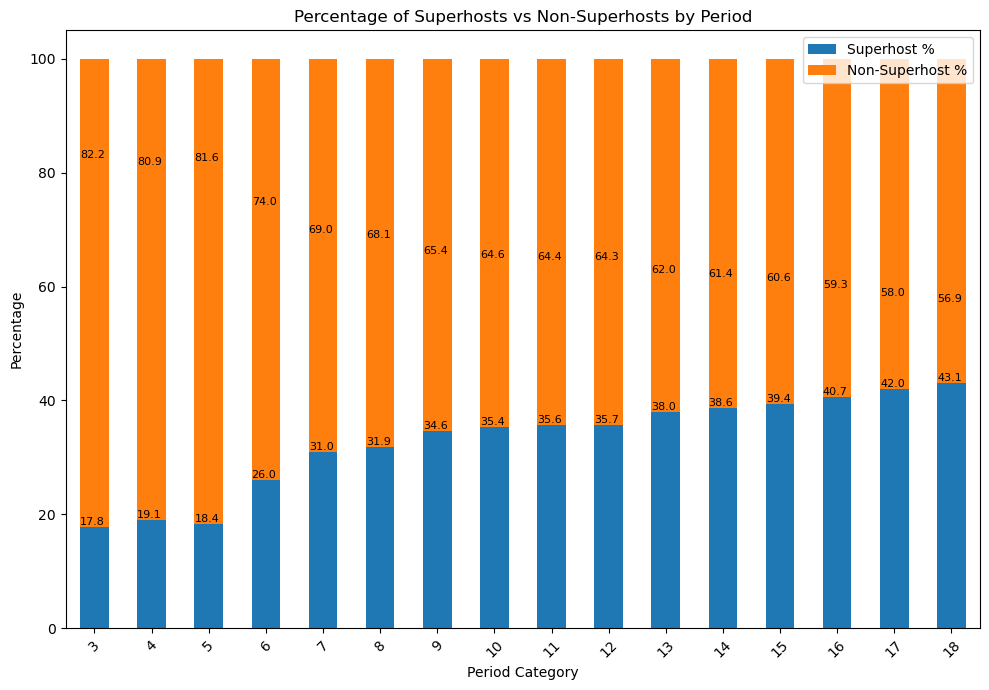

In [9]:
# Assuming 'df' is your DataFrame, with a 'Period Category' column defining each period,
# and a 'Superhost' column with binary values where 1 indicates a superhost and 0 indicates a non-superhost.

# Calculate the percentage of superhosts and non-superhosts for each period
superhost_percentage = df.groupby('Period Category')['Superhost'].mean() * 100
non_superhost_percentage = 100 - superhost_percentage

# Create a DataFrame for the stacked bar chart
stacked_data = pd.DataFrame({
    'Superhost %': superhost_percentage,
    'Non-Superhost %': non_superhost_percentage
})

# Create the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Period Category')
ax.set_title('Percentage of Superhosts vs Non-Superhosts by Period')

# Annotate the percentage on each bar
for i in ax.patches:
    # Get X and Y coordinates of the bar
    x, y = i.get_x(), i.get_height()
    ax.text(x, y, str(round(i.get_height(), 1)), fontsize=8, verticalalignment='bottom')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()


# CLEANING

# Imputing missing values

In [10]:
# Assuming 'df' is your DataFrame
df = df.drop(['Created Date',], axis=1) #,'Airbnb Host ID','Airbnb Property ID'
# Convert 'Zipcode' column to object type
df['Zipcode'] = df['Zipcode'].astype(object)

# Columns to be removed
columns_to_remove = ['zip_hispanic_or_latino_anyrace', 'zip_white_nothispanic', 'zip_black_nothispanic', 'zip_asian_nothispanic']

# Remove the specified columns
df.drop(columns=columns_to_remove, axis=1, inplace=True)

# Display the DataFrame's information to verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  int64  
 1   Airbnb Property ID                                120217 non-null  int64  
 2   superhost_period_all                              120217 non-null  int64  
 3   scrapes_in_period                                 120217 non-null  int64  
 4   prev_scrapes_in_period                            120217 non-null  int64  
 5   Superhost                                         120217 non-null  int64  
 6   superhost_change_lose_superhost                   120217 non-null  int64  
 7   superhost_change_gain_superhost                   120217 non-null  int64  
 8   rating_ave_pastYear                               100372 non-null  float64
 9   numR

In [11]:
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140,10610,5,26,24,0,0,0,NaN,NaN,...,1.363636,104924,13169324,449,25390,0.004279,0.001928,19.739130,NaN,3
1,2140,10610,6,38,26,0,0,0,NaN,NaN,...,1.472727,68005,7337911,276,22274,0.004059,0.003035,84.833333,19.739130,4
2,2140,10610,7,23,38,0,0,0,NaN,NaN,...,1.472727,134202,17482964,340,19451,0.002533,0.001113,17.903226,84.833333,5
3,2140,10610,8,20,23,0,0,0,NaN,NaN,...,1.125000,132913,18431773,366,28349,0.002754,0.001538,47.000000,17.903226,6
4,2140,10610,9,20,20,0,0,0,NaN,NaN,...,1.472727,118284,15313425,395,27483,0.003339,0.001795,11.800000,47.000000,7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  int64  
 1   Airbnb Property ID                                120217 non-null  int64  
 2   superhost_period_all                              120217 non-null  int64  
 3   scrapes_in_period                                 120217 non-null  int64  
 4   prev_scrapes_in_period                            120217 non-null  int64  
 5   Superhost                                         120217 non-null  int64  
 6   superhost_change_lose_superhost                   120217 non-null  int64  
 7   superhost_change_gain_superhost                   120217 non-null  int64  
 8   rating_ave_pastYear                               100372 non-null  float64
 9   numR

In [13]:
# Create imputers
mean_imputer = SimpleImputer(strategy='mean')  # for numerical columns
mode_imputer = SimpleImputer(strategy='most_frequent')  # for categorical/binary columns

# Iterate over each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Numerical columns: Use mean imputation (or median)
        df[col] = mean_imputer.fit_transform(df[[col]]).ravel()
    elif df[col].dtype == 'object' or df[col].dtype == 'bool':
        # For boolean columns, convert to integers, impute, then convert back
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
            df[col] = mode_imputer.fit_transform(df[[col]]).ravel()
            df[col] = df[col].astype(bool)
        else:
            # Categorical columns: Use mode imputation
            df[col] = mode_imputer.fit_transform(df[[col]]).ravel()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  float64
 1   Airbnb Property ID                                120217 non-null  float64
 2   superhost_period_all                              120217 non-null  float64
 3   scrapes_in_period                                 120217 non-null  float64
 4   prev_scrapes_in_period                            120217 non-null  float64
 5   Superhost                                         120217 non-null  float64
 6   superhost_change_lose_superhost                   120217 non-null  float64
 7   superhost_change_gain_superhost                   120217 non-null  float64
 8   rating_ave_pastYear                               120217 non-null  float64
 9   numR

## Remove outliers

Finding specific methods to remove outliers for each row can be difficult. Have taken a simpler approach. 

In [15]:
df_backup = df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  float64
 1   Airbnb Property ID                                120217 non-null  float64
 2   superhost_period_all                              120217 non-null  float64
 3   scrapes_in_period                                 120217 non-null  float64
 4   prev_scrapes_in_period                            120217 non-null  float64
 5   Superhost                                         120217 non-null  float64
 6   superhost_change_lose_superhost                   120217 non-null  float64
 7   superhost_change_gain_superhost                   120217 non-null  float64
 8   rating_ave_pastYear                               120217 non-null  float64
 9   numR

In [17]:
# Applying outlier removal for all numerical columns, removing anything outside 3 standard deviations
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Define the upper and lower bounds for outliers
        lower_bound = col_mean - 4 * col_std
        upper_bound = col_mean + 4 * col_std

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66926 entries, 0 to 120127
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Airbnb Host ID                                    66926 non-null  float64
 1   Airbnb Property ID                                66926 non-null  float64
 2   superhost_period_all                              66926 non-null  float64
 3   scrapes_in_period                                 66926 non-null  float64
 4   prev_scrapes_in_period                            66926 non-null  float64
 5   Superhost                                         66926 non-null  float64
 6   superhost_change_lose_superhost                   66926 non-null  float64
 7   superhost_change_gain_superhost                   66926 non-null  float64
 8   rating_ave_pastYear                               66926 non-null  float64
 9   numReviews_pastYear  

This script iterates over each column in your DataFrame and applies the IQR method to columns with numerical data (integers and floats). For boolean and categorical columns, it doesn't perform any outlier removal. You may need to adjust this script depending on the specific characteristics of your data.

The records are halved but the quality of the data is higher. (Can experiment with seeing what happens when we dont remove any at all)

# Categorical variables encoding

In [19]:
# Assuming 'df' is your DataFrame and you want to drop the 'Created Date' column

# Drop the 'Created Date' column


# Display the DataFrame's information to verify the column has been dropped
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66926 entries, 0 to 120127
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Airbnb Host ID                                    66926 non-null  float64
 1   Airbnb Property ID                                66926 non-null  float64
 2   superhost_period_all                              66926 non-null  float64
 3   scrapes_in_period                                 66926 non-null  float64
 4   prev_scrapes_in_period                            66926 non-null  float64
 5   Superhost                                         66926 non-null  float64
 6   superhost_change_lose_superhost                   66926 non-null  float64
 7   superhost_change_gain_superhost                   66926 non-null  float64
 8   rating_ave_pastYear                               66926 non-null  float64
 9   numReviews_pastYear  

In [20]:
# Assuming 'df' is your DataFrame
# Select only the categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the DataFrame's information to verify
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66926 entries, 0 to 120127
Columns: 270 entries, Airbnb Host ID to Neighborhood_Woodlawn
dtypes: bool(184), float64(86)
memory usage: 56.2 MB


# Building a model

In [21]:
df_encoded['Superhost'].value_counts()

Superhost
0.0    40962
1.0    25964
Name: count, dtype: int64

In [22]:
df_encoded.head(30)

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,Neighborhood_South Shore,Neighborhood_Uptown,Neighborhood_Washington Heights,Neighborhood_Washington Park,Neighborhood_West Elsdon,Neighborhood_West Loop/Greektown,Neighborhood_West Ridge,Neighborhood_West Town/Noble Square,Neighborhood_Wicker Park,Neighborhood_Woodlawn
0,2140.0,10610.0,5.0,26.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
1,2140.0,10610.0,6.0,38.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
2,2140.0,10610.0,7.0,23.0,38.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
3,2140.0,10610.0,8.0,20.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
4,2140.0,10610.0,9.0,20.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
5,2140.0,10610.0,10.0,26.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
6,2140.0,10610.0,11.0,21.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
7,2140.0,10610.0,12.0,24.0,21.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
8,2140.0,10610.0,13.0,23.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
9,2140.0,10610.0,14.0,18.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 66926 entries, 0 to 120127
Data columns (total 270 columns):
 #    Column                                            Dtype  
---   ------                                            -----  
 0    Airbnb Host ID                                    float64
 1    Airbnb Property ID                                float64
 2    superhost_period_all                              float64
 3    scrapes_in_period                                 float64
 4    prev_scrapes_in_period                            float64
 5    Superhost                                         float64
 6    superhost_change_lose_superhost                   float64
 7    superhost_change_gain_superhost                   float64
 8    rating_ave_pastYear                               float64
 9    numReviews_pastYear                               float64
 10   numCancel_pastYear                                float64
 11   num_5_star_Rev_pastYear                           float6

In [24]:
df_encoded = df_encoded.drop(['Airbnb Host ID','Airbnb Property ID'], axis=1)

In [25]:
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140.0,10610.0,5.0,26.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,1.363636,104924.0,13169324.0,449.0,25390.0,0.004279,0.001928,19.739130,35.449269,3.0
1,2140.0,10610.0,6.0,38.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,68005.0,7337911.0,276.0,22274.0,0.004059,0.003035,84.833333,19.739130,4.0
2,2140.0,10610.0,7.0,23.0,38.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,134202.0,17482964.0,340.0,19451.0,0.002533,0.001113,17.903226,84.833333,5.0
3,2140.0,10610.0,8.0,20.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,1.125000,132913.0,18431773.0,366.0,28349.0,0.002754,0.001538,47.000000,17.903226,6.0
4,2140.0,10610.0,9.0,20.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,118284.0,15313425.0,395.0,27483.0,0.003339,0.001795,11.800000,47.000000,7.0


# Using gradboost for superhost loss classification

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded

# Define your feature columns and the target variable
selected_features = df.columns.tolist()
selected_features.remove('superhost_change_lose_superhost')
selected_features.remove('Superhost')

target = 'superhost_change_lose_superhost'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extracting feature importances
feature_importances = model.feature_importances_
features = selected_features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df.head())  # Modify this line if you want to see more or fewer features


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

# Using logistic regression

In [29]:
df_backup = df_encoded

In [28]:
# Convert 'Superhost' to integer type
df_encoded['superhost_change_lose_superhost'] = df_encoded['superhost_change_lose_superhost'].astype(int)

# Finding elbow using gradient boosting importance

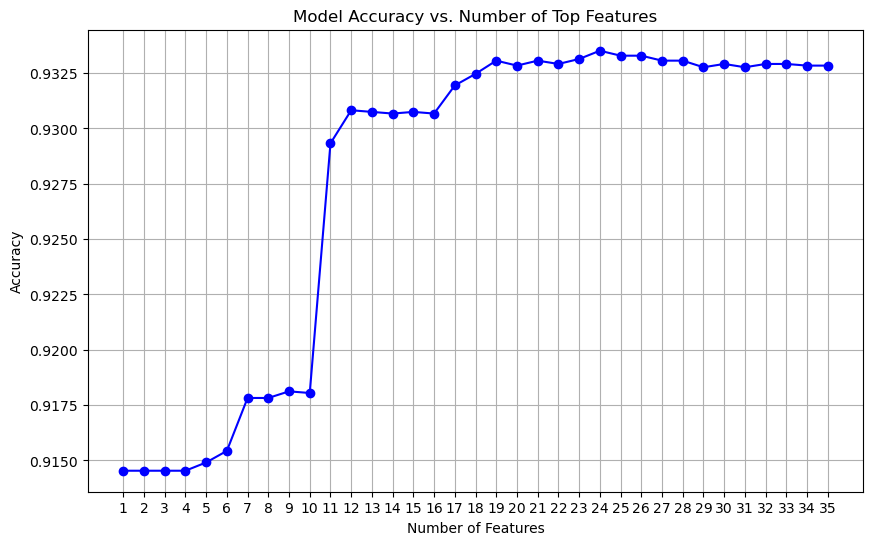

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded and importance_df are already defined and available

# Apply log transformation to non-negative numerical features
for col in df_encoded.columns:
    if df_encoded[col].min() >= 0 and df_encoded[col].dtype in ['float64', 'int64']:
        df_encoded[col] = np.log1p(df_encoded[col])

# Define the target variable
target = 'superhost_change_lose_superhost'

# Initialize a list to store accuracies for different feature counts
accuracies = []

# Loop over different numbers of top features
for n_features in range(1, 36):  # start from 1 to avoid empty feature set
    # Select top N important features
    important_features = list(importance_df['Feature'][:n_features])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_encoded[important_features], df_encoded[target], test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42,solver='lbfgs')
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 36), accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Top Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, 36))
plt.grid(True)
plt.show()


In [31]:
# Define the list of specific columns for which to generate the correlation matrix
columns = list(importance_df['Feature'][importance_df.Importance > 0.005])

# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Filter the DataFrame to include only the specified columns
    filtered_df = df[columns]

    # Generate the correlation matrix for these variables
    correlation_matrix = filtered_df.corr()
#     print(correlation_matrix)
    
    
    
threshold = 0.5
# Create a dictionary to store the importance of each variable
importance_dict = importance_df.set_index('Feature')['Importance'].to_dict()

# Function to get the more important variable from a pair
def get_more_important(var1, var2):
    return var1 if importance_dict.get(var1, 0) > importance_dict.get(var2, 0) else var2

# Set to store variables to keep (choosing the more important variable from each highly correlated pair)
variables_to_keep = set(correlation_matrix.columns)  # Initially include all variables

# Iterate over the correlation matrix and compare pairs of highly correlated variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Find the more important variable from the pair
            more_important_var = get_more_important(correlation_matrix.columns[i], correlation_matrix.columns[j])
            # Remove the less important variable
            less_important_var = correlation_matrix.columns[i] if more_important_var == correlation_matrix.columns[j] else corr_matrix.columns[j]
            variables_to_keep.discard(less_important_var)

# Print the list of variables to keep
print("Variables to keep after considering multicollinearity and importance:")
print(list(variables_to_keep))

Variables to keep after considering multicollinearity and importance:
['tract_prev_superhosts_ratio', 'prev_rating_ave_pastYear', 'prev_scrapes_in_period', 'prev_hostResponseNumber_pastYear', 'num_5_star_Rev_pastYear', 'numCancel_pastYear']


# With statmodels

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.252739892290381
            Iterations: 40
            Function evaluations: 40
            Gradient evaluations: 40
                                  Logit Regression Results                                 
Dep. Variable:     superhost_change_gain_superhost   No. Observations:                53540
Model:                                       Logit   Df Residuals:                    53533
Method:                                        MLE   Df Model:                            6
Date:                             Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1113
Time:                                     15:42:30   Log-Likelihood:                -13532.
converged:                                    True   LL-Null:                       -15226.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z| 

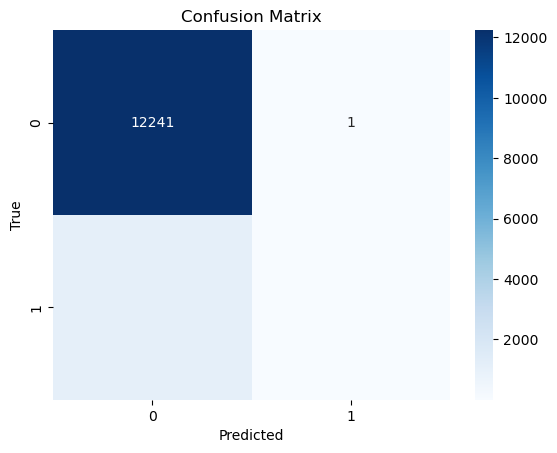

In [32]:
# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded

# Apply log transformation to non-negative numerical features
for col in df.columns:
    if df[col].min() >= 0 and df[col].dtype in ['float64', 'int64']:
        df[col] = np.log1p(df[col])

# Define your feature columns and the target variable
selected_features = df.columns.tolist()
selected_features.remove('superhost_change_lose_superhost')
target = 'superhost_change_lose_superhost'

features = ['tract_prev_superhosts_ratio', 
            'prev_rating_ave_pastYear', 
            'prev_scrapes_in_period', 
            'prev_hostResponseNumber_pastYear', 
            'num_5_star_Rev_pastYear', 
            'numCancel_pastYear']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding a constant to the model (Statsmodels does not add it by default)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)


# Initialize and fit the logistic regression model using Statsmodels
model_sm = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1')
# Print the model summary
print(model_sm.summary())

# Predict on the test set
y_pred = model_sm.predict(X_test_sm)
y_pred_class = (y_pred > 0.5).astype(int)  # Converting probabilities to class labels (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Polynomial regression

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2377198475247199
            Iterations: 193
            Function evaluations: 193
            Gradient evaluations: 193
                                  Logit Regression Results                                 
Dep. Variable:     superhost_change_gain_superhost   No. Observations:                30514
Model:                                       Logit   Df Residuals:                    30486
Method:                                        MLE   Df Model:                           27
Date:                             Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1143
Time:                                     15:46:15   Log-Likelihood:                -7253.8
converged:                                    True   LL-Null:                       -8189.7
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>

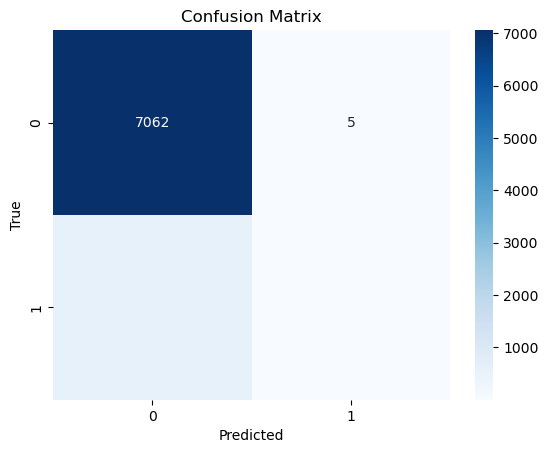

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded.copy()

# Apply log transformation to non-negative numerical features
for col in df.columns:
    if df[col].min() >= 0 and df[col].dtype in ['float64', 'int64']:
        df[col] = np.log1p(df[col])

# Define your feature columns and the target variable
features = ['tract_prev_superhosts_ratio', 
            'prev_rating_ave_pastYear', 
            'prev_scrapes_in_period', 
            'prev_hostResponseNumber_pastYear', 
            'num_5_star_Rev_pastYear', 
            'numCancel_pastYear']
target = 'superhost_change_gain_superhost'

# Generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
df_interactions = poly.fit_transform(df[features])

# Create a DataFrame for interaction terms with feature names
interaction_features = poly.get_feature_names_out(features)
df_interactions = pd.DataFrame(df_interactions, columns=interaction_features)

# Combine with the original df_encoded
df_combined = pd.concat([df, df_interactions], axis=1)

# Ensure that the combined DataFrame does not have any missing or infinite values
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)
df_combined.dropna(inplace=True)

# Splitting the dataset into training and testing sets, including the interaction terms
X = df_combined[interaction_features]  # Use only interaction features for the model
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding a constant to the model (Statsmodels does not add it by default)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Initialize and fit the logistic regression model using Statsmodels
model_sm = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1')
print(model_sm.summary())  # Print the model summary

# Predict on the test set
y_pred = model_sm.predict(X_test_sm)
y_pred_class = (y_pred > 0.5).astype(int)  # Converting probabilities to class labels (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
correlation_matrix.to_csv(os.path.join(os.getcwd(), 'corr-matrix-15-vars.csv'))